# Investigating Hydrogen and Sodium Atomic Spectra

### Date: 6/05/19 - 7/05/19
### Group Members: Aayushi Verma, Diana Kommedal, Alex Goodenbour

## Introduction

If an electric current is passed through a sample of hydrogen gas at a low pressure, a blue light is observed. This light occurs as the electrons in the gas are excited and transition between discrete energy levels. Each of these transitions corresponds to a discrete energy difference. The excited electrons are not stable in these elevated energy levels and soon transition down to their previous energy level, emitting a photon of energy exactly correponding to the discrete change in energy of their transition. The blue light we see is made up of these sets of photons with discrete wavelengths corresponding to electron transitions in hydrogen. The light of the hydrogen spectra or any other spectra can be split into its component wavelengths for examination using a spectrometer. 

In this experiment, we will use a spectrometer to identify the visible lines in the hydrogen spectrum. We will then determine which of these lines correspond to the Balmer series of hydrogen in which electrons transition from higher energy levels to $n = 2$. From these experimental values for the Balmer series wavelengths, we will then find an experimental value for Rydberg's constant and compare this with the accepted value. We will then observe the spectrum emitted by a hydrogen and deuterium lamp and attempt to measure the difference between wavelengths of hydrogen and deuterium emissions. Finally, we will identify the visible lines of the sodium spectrum and classify these transitions into series based on azimuthal quantum number.

## Method

### Calibrating the Spectrometer

Before any measurements are taken, the spectrometer must be properly calibrated. This is done by comparing the reading of the spectrometer with the prominent D-lines of the sodium spectrum which have precisely calculated wavelengths to which the spectrometer can be aligned.

A sodium lamp was placed close to the entrance slit of the spectrometer and the entrance slit widened to 40 on the arbitrary scale. The calibrated drum was then set to 58.9 which correponds to a wavelength of 589.0 nm correponding to the wavelength of the left sodium D-line. After ensuring the shutter reducing wedge and eye-piece shutters are in the wide-open position, a yellow line was observed through the eye-piece. The crosswires should be overlayed on this image and in sharp focus. If they are not then the focus can be adjusted by moving the eyepiece with respect to the shutter housing. The width of the entrance slit was then reduced until the yellow line resolved into two lines in sharp focus. The sodium D-lines. If these lines are not in focus, the focus could be adjusted by moving the shutter housing with respect to the telescope mount. As the left D-line did not directly intersect the crosswires, the position of the crosswires was adjusted using the fine adjustment screw to overlay the crosswires on this line. The spectrometer is now calibrated. 

### Balmer Series of Hydrogen

Before attempting to identify the Balmer series of hydrogen, we used a white light source to determine the range of wavelengths visible to the human eye. This range was recorded and it was noted how many lines in the balmer series exist in this range. 

In the spectrum of atomic hydrogen, the only visible wavelengths are those corresponding to the balmer series. However, in the source of hydrogen gas used, other transitions are present due to transitions in molecular hydrogen. Therefore, only prominent wavelengths were recorded. 

Using these wavelengths, a table of the ratios of each wavelength to the others. This table could then be compared with a similar table composed of the theoretical ratios between Balmer series wavelengths to identify which of the recorded wavelengths correspond to the Balmer series of hydrogen.

Next, the emission spectra of a combined hydrogen-deuterium source was observed. As above, prominent wavelengths visible were recorded and tabulated.

### Measurement of the Visible Spectrum of Sodium

Before observing the sodium spectrum, the sodium spectral lamp was turned on and allowed to warm up for 10 minutes. The Na spectrum was then observed using the spectrometer. After narrowing the width of the entrance slit, it became apparent that the transitions were doublets. The wavelengths of the left line of the 7 sets of doublets were measured to 4 significant figures, converted to wavenumbers ($cm^{-1}$), and tabulated. 

## Analysis

In [13]:
# Setup and helper function definition

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds

def round_to_1(x):
    return round(x, -int(np.floor(np.log10(abs(x)))))


in_to_cm = lambda x: 2.54*x

def model(p,x):
    return p[0] + p[1]*x


def bestfit(length, x,y,sigma_x, sigma_y):
    x = x[:length]
    y = y[:length]
    sigma_x = sigma_x[:length]
    sigma_y = sigma_y[:length]
    
    bf = np.zeros((2,length))
    bf[0,:] = x**0
    bf[1,:] = x

    A = np.zeros((2,2))
    b = np.zeros(2)
    for k in range(2):
        for j in range(2):
            A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_y**2) 
        b[k] = np.sum(y*bf[k,:]/sigma_y**2)

    A_inv = np.linalg.inv(A)
    a = np.linalg.solve(A,b)
    a_unc = np.sqrt(np.diag(A_inv))[1]
    return a, a_unc*1e26


data = pds.read_csv("hna.csv")

### Calculating the Theoretical Balmer Series

In [25]:
# Constants 
m_e = 9.10938356e-31 # Constant
R_inf = 10973731.568508 # Constant
m_h = 1.6726219e-27 # Constant
m_d = 2*m_h

def R_h(m_n):
    return R_inf*((m_n)/(m_e+m_n))

def lambda_n(n, m_n):
    return 1/(R_h(m_n)*((1/4)-(1/(n**2))))

def lambda_n_customRh(n, R_h):
    return 1/(R_h*(0.25-1/(n**2)))

def lambda_ratio(m_1, m_2):
    return (1+(m_e/m_1))/(1+(m_e/m_2))

def lambda_diff(n):
    return lambda_n(n, m_h)*(1-(lambda_ratio(m_d, m_h)))

print("3rd order H lambda: ", round(lambda_n(3, m_h)*1e9,2), "nm")
print("R_h for hydrogen: ", round(R_h(m_h),2), "m^-1")

print()

print("Balmer Series for Hydrogen")
for i in [3,4,5,6]:
    print("λ_H, n = ", i, ":", round(lambda_n(i, m_h)*1e9,2), "nm")
print()

print("Balmer Series for Deuterium")
for i in [3,4,5,6]:
    print("λ_D, n = ", i, ":", round(lambda_n(i, m_d)*1e9,2), "nm")
print()

print("Difference Between Two Series")
for i in [3,4,5,6]:
    print("diff n = ", i, ":", round(lambda_diff(i)*1e9,4), "nm")

3rd order H lambda:  656.47 nm
R_h for hydrogen:  10967758.34 m^-1

Balmer Series for Hydrogen
λ_H, n =  3 : 656.47 nm
λ_H, n =  4 : 486.27 nm
λ_H, n =  5 : 434.17 nm
λ_H, n =  6 : 410.29 nm

Balmer Series for Deuterium
λ_D, n =  3 : 656.29 nm
λ_D, n =  4 : 486.14 nm
λ_D, n =  5 : 434.05 nm
λ_D, n =  6 : 410.18 nm

Difference Between Two Series
diff n =  3 : 0.1787 nm
diff n =  4 : 0.1323 nm
diff n =  5 : 0.1182 nm
diff n =  6 : 0.1117 nm


## Finding $R_h$

Measured Wavelengths for Hydrogen
656.0 nm
486.0 nm
434.0 nm
410.5 nm

R_h 10995000 ± 200 m^-1
R_inf 11001000 ± 200 m^-1
Ratio of R_inf to calculated value:  1.002495
Next in series is then estimated to be:  396.135 ± 0.006 nm


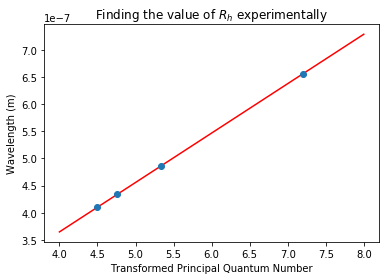

In [24]:
n_transformed = 1/(0.25-1/((data.n)**2))
h_lambda_transformed = data.H_lambda*1e-9

print("Measured Wavelengths for Hydrogen")
for wl in data.H_lambda[:4]:
    print(wl, "nm")
print()

plt.errorbar(n_transformed, h_lambda_transformed, data.H_unc*1e-9, 0, fmt='o') # Change uncertainties
# Fix whatever is happening here
plt.title("Finding the value of $R_h$ experimentally")
plt.ylabel("Wavelength (m)")
plt.xlabel("Transformed Principal Quantum Number")

def unc_estimated_lambda(n, R_h, R_h_unc):
    return ((4*n**2)*R_h_unc)/(R_h**2*(n**2-4))

a, a_unc = bestfit(4, np.array(n_transformed), np.array(h_lambda_transformed), np.array(data.H_unc*1e9), np.array(data.H_unc*1e-9))
#print(a)

xx = np.linspace(4,8,1000)
plt.plot(xx, model(a, xx), "r-")

grad = a[1]

R_h = 1/grad
R_h_unc = (a_unc)/(R_h**2) # Propagation of uncertainties


R_inf_e  = R_h*(1+(m_e/m_h))
R_inf_e_unc = (R_h_unc/R_h)*R_inf_e
print("R_h", int(round(R_h,-3)), "±", int(round_to_1(R_h_unc)), "m^-1")
print("R_inf", int(round(R_inf_e,-3)), "±", int(round_to_1(R_inf_e_unc)), "m^-1")


print("Ratio of R_inf to calculated value: ", round(R_inf_e/R_inf, 6))

print("Next in series is then estimated to be: ", round(lambda_n_customRh(7, R_h)*1e9, 3), "±", round_to_1(unc_estimated_lambda(7, R_h, R_h_unc)*1e9), "nm") # Needs uncertainty


### Sodium

In [9]:
# From wavelength in nm to wavenumber in cm^(-1)
def wl_wn(lambd):
    return 1e7/lambd

wl_wn_unc = lambda lambd, unc: np.abs(1e7/(lambd**2))*np.abs(unc)

print("""
Series data was determined by comparison of calculated wavenumbers with Figure 9.2.
""")

for i, val in enumerate(data.Na_lambda):
    print(round(wl_wn(val),2), "±", round_to_1(wl_wn_unc(wl_wn(val),data.Na_unc[i])), "Series: ", data.Na_series[i])


Series data was determined by comparison of calculated wavenumbers with Figure 9.2.

16260.16 ± 0.02 Series:  S
16977.93 ± 0.02 Series:  P
17605.63 ± 0.02 Series:  D
19417.48 ± 0.01 Series:  S
20100.5 ± 0.01 Series:  D
21052.63 ± 0.01 Series:  S
21436.23 ± 0.01 Series:  S


## Discussion

By constructing a linear relationship with a gradient of $1/R_h$ from our obtained and classified values for the wavelengths of the Balmer series for hydrogen we calculated a value of $R_h$ of $10995000 \pm 200$ $m^{-1}$ The accepted literature value for $R_h$ is $10967800$ $m^{-1}$ which is not within our calculated range, indicating that our uncertainties do not represent the true uncertainty in the data. Using our obtained value of $R_h$, we can calculate an experimental value for Rydberg's constant $R_\infty$. The value we obtained was $11001000 \pm 200$ $m^{-1}$. The accepted literature value for $R_\infty$ is $10973732$ $m^{-1}$ which is also not within our calculated range indicating that the uncertainties in our calculated value are too small to represent that true uncertainty in our data. In trying to determine the difference in wavelength between corresponding lines in the hydrogen and deuterium spectra, we were unable to distinguish between doublets and thus were unable to obtain an accurate value for the distance between these spectra. Finally, we identified the 7 visible lines in the sodium spectrum and classified them based on their wavenumber into groups based on the series to which each transition belongs.

From the uncertainties calculated for Rydberg's constant, it seems that the uncertainties in the wavelengths of the visible lines of the hydrogen emission spectrum did not represent the true uncertainties in the measurements due to the fact that the accepted value for Rydberg's constant was not present in the range of values calculated in this experiment. This could have been as a result of several different factors. One possible explanation is a systematic error due to improper calibration of the spectrometer. If the crosswires of the viewing screen were not properly aligned for a given wavelength, a constant wavelength would be effectively added or subtracted to the values collected using the spectrometer. This defect would have propagated through to the final calculated value for Rydberg's constant and would account for the uncertainty in this calculated value of $R_\infty$ not including the accepted literature value. Another possible explanation is the small number of data points from which a linear relationship was created. As there are only 4 lines of the balmer series of hydrogen visible to the human eye, without more capable equipment, we were limited to these 4 points in constructing a linear relationship to determine experimental values for $R_h$ and $R_\infty$. With only 4 points, constructing a linear relationship could very well result in a gradient and uncertainty that does not include the theoretical values for these constants due simply to the extremely small sample size. If this experiment were to be repeated, we would likely take action from the beginning of the experiment to record possible sources of uncertainty that could influence our final calculated values. We would also use a spectrometer capable of measuring the wavelength of infrared and ultraviolet light so that more values of wavelengths in the Balmer series could be used in constructing a linear relationship to determined Rydberg's constant.

The section of this experiment most in need of improvement is the determination of the difference between the emission spectra of hydrogen and its isotope deuterium. Upon observation of a twin hydrogen and deuterium source, we attempted to measure the wavelengths of each pair of lines in the combined spectrum but were unable to distinguish between the sets of lines and so any measurement of the difference in the wavelengths of each line would have been meaningless. Although steps were taken to correct the focus of the spectrometer as to have the image in sharpest focus possible, our inability to distinguish between pairs of lines may have been due to a discrepancy in the focus of the image. This would result in one line appearing at each predicted wavelength rather than two. Another, perhaps more likely explanation is that the resolving power of the prism in the spectrometer used to split incoming light into its component wavelengths was not high enough to distinguish between the small difference in wavelengths between hydrogen's and deuterium's spectra. Therefore, if this experiment were to be repeated, we would use a spectrometer with a prism of greater resolving power and take adequate steps to ensure the image provided by the spectrometer is in the sharpest focus possible so that the difference in wavelengths between these two spectra can be calulated.

In determining the series that each transition measured for sodium belonged to, we calculated the associated wavenumber for each wavelength. Wavenumber is directly proportional to the energy of a photon released during a specific transition. Using the wavenumber associated with each wavelength in the sodium spectra, we classified each wavelength into a series based on its transition. This transition was determined by looking for transitions that matched the change in energy of a given wavelength on a diagram of the electron transitions of sodium. However, the wavenumbers calculated were not particularly distinct and so it was difficult to use the scale on the electron transition diagram as this scale had very sparse divisions. This may have resulted in the mislabelling of wavelengths into the wrong series. If we were to repeat this experiment, we would obtain a more robust method for determining the series of a given energy shift. 

## Conclusion

- What we did and results as stated in the discussion / comparison with accepted literature values. 
- Relevance to outside world etc.